In [11]:
def movingAverage(prices, n):
    """ 
    Input: prices is a list of prices (ordered in time), n is an integer
    
    Calculates n-day moving average for prices

    Output: returns a list movingAverage with None for the first n-1 values in prices 
    and the appropriate moving average for the rest
    """
    

    movingAverage = []                      #starting a new list
    m=1                                     #setting up a counter variable to catch 'None' values by comparing them against n variable and for calculating averages   
    for price in prices:                    #initiating a loop to go through all elements of the 'prices' list
        if m<n:     a= None                 
        else:       a=sum(prices[m-n:m])/n  #calculating average of last n values for every element in 'prices' list
        movingAverage.append(a)             #adding the calculated average to the new list
        m+=1                                #running the counter
    return (movingAverage)                  #returning list of averages   

In [12]:
def testMovingAverage():
    """
    test your implementation of movingAverage
    """    
    prices = [2,3,4,5,8,5,4,3,2,1]
    n = 3
    ma3 = movingAverage(prices,n)
    print(ma3)
    print([None, None, 3.0, 4.0, 5.666666666666667, 6.0, 5.666666666666667, 4.0, 3.0, 2.0])
    n = 2
    ma2 = movingAverage(prices,n)
    print(ma2)
    print([None, 2.5, 3.5, 4.5, 6.5, 6.5, 4.5, 3.5, 2.5, 1.5])

testMovingAverage()

[None, None, 3.0, 4.0, 5.666666666666667, 6.0, 5.666666666666667, 4.0, 3.0, 2.0]
[None, None, 3.0, 4.0, 5.666666666666667, 6.0, 5.666666666666667, 4.0, 3.0, 2.0]
[None, 2.5, 3.5, 4.5, 6.5, 6.5, 4.5, 3.5, 2.5, 1.5]
[None, 2.5, 3.5, 4.5, 6.5, 6.5, 4.5, 3.5, 2.5, 1.5]


In [13]:
def crossOvers(prices1,prices2):
    """ 
    Identify cross-over indices for two equal-length lists of prices (here: moving averages)
    
    Input: two lists of prices (ordered by time)
    Output: returns list of crossover points: "crossovers"

    Each item in "crossovers" is a list [timeIndex,higherIndex], where:
    
    -timeIndex is the crossover time index
    
    -higherIndex indicates which price becomes higher at timeIndex: 
    either 1 for first list or 2 for second list
    """
  
    crossovers = []                  #initiating a new list   
    for i in range(1,len(prices1)):  #prices1 and prices2 have equal number of rows. so either could be used here. initiating a range function to go through all elements of the prices1 and prices2 lists
            if prices1[i-1]!=None and prices2[i-1]!=None:    #check for 'None' values, which should be skipped            
                if   (prices1[i]>prices2[i] and prices1[i-1]<prices2[i-1]) : crossovers.append([i,1])   #if conditional outcome for i elements different to outcome for i-1 elements (crossover of averages occured) --> add to the list 
                elif (prices1[i]<prices2[i] and prices1[i-1]>prices2[i-1]) : crossovers.append([i,2])   #same as above  
    return (crossovers)              #returning the list of crossovers of moving averages

In [14]:
def testCrossOvers():
    """
    test your implementation of crossOvers
    """
    prices = [2,3,4,5,4,3,2,1,6,1]
    list1 = movingAverage(prices,2)
    list2 = movingAverage(prices,3)
    list1 = [None, 2.5, 3.5, 4.5, 4.5, 3.5, 2.5, 1.5, 3.5, 3.5]
    list2 = [None, None, 3.0, 4.0, 4.333333333333333, 4.0, 3.0, 2.0, 3.0, 2.6666666666666665]
    print(crossOvers(list1,list2))
    print([[5, 2], [8, 1]]) # correct result
    
testCrossOvers()

[[5, 2], [8, 1]]
[[5, 2], [8, 1]]


In [15]:
def makeTrades(money, prices, crossovers):
    """
    Given an initial cash position, use a list of crossovers to make trades
    
    Input: money - initial cash position; prices - list of prices (ordered by time); crossovers - list of crossovers     
    Output: currentValue - list of value of position (either in stock value or cash) at each time index    
    
    Assume each item crossovers[i] is a list [timeIndex,buyIndex]    
    
    Assume that buyIndex = 1 means that short-term MA becomes higher than long term at this timeIndex
    buyIndex = 2 means that long-term MA becomes higher than short term.    

    You would like to buy at any timeIndex where crossover's buyIndex indicates 1, sell at 2. 
    
    That is, you want to buy whenever SHORT-TERM MA becomes higher than LONG-term (AND you have a cash position),
    and sell when the opposite cross-over occurs (AND you have a stock position).
    
    Use all money/stock available to buy/sell at the current price: you will always hold either stocks or cash, but never both.

    Assume fractional stock quantities, no transaction fees.      
    """

    makeTrades=[]                                                   #initiating a new list
    stock=0; p=0                                                    #stock- number of shares you hold; p- a counter variable    
    for TI,BI in crossovers:                                        #loop through TimeIndex and BuyIndex in the crossovers list
#looping through all dates, where date (timeperiod) is in the crossovers list (i.e. = TI)- execute a transaction (BI=1: Buy; BI=2: Sell)
#if the timeperiod is not in the crossovers list- workout the balance (pv) and add it to the list of balances
        for timeperiod in range(p,len(prices)):                     #range set from p to ensure the loop does not go through the already 'explored' timeperiods
            p+=1            
            if timeperiod== TI: 
                if BI ==1:  
                    stock= money/prices[timeperiod]
                    money=0                                         #when bought shares- set money/cash to 0    
                    balance=stock*prices[timeperiod]                #balance is a pv of shares or money/cash
                  
                elif BI==2 and stock!=0:                            #only execute when you hold shares- you cannot sell shares you do not hold!
                    money= stock*prices[timeperiod]
                    balance=money                    
                    stock=0                                         #when sold shares- set shares value to 0
               
                makeTrades.append(balance)
                break                                               #break the internal loop to go to the next outer loop value 

            else: 
                if stock !=0: balance= stock* prices[timeperiod]    #when you hold shares             
                else: balance=money                                 #else balance is the same as you current money/cash
                makeTrades.append(balance)                          #add balance (pv) to the list
    return makeTrades                                               #return the list of present values for every timeperiod


In [16]:
def testTrades():
    """
    test your implementation of makeTrades
    """
    prices = [2,3,4,5,4,3,2,1,6,1,5,7,8,10,7,9]
    list1 = movingAverage(prices,2) # this is how the crossovers were generated from the prices...
    list2 = movingAverage(prices,3)
    cos = crossOvers(list1,list2)
    cos = [[5, 2], [8, 1], [10, 2], [11, 1], [15, 2]]
    startingMoney = 1000
    print(makeTrades(startingMoney, prices, cos))
    print([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000.0, 166.66666666666666, 833.3333333333333, 833.3333333333333, 952.3809523809523, 1190.4761904761904, 833.3333333333333, 1071.4285714285713])


testTrades()

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000.0, 166.66666666666666, 833.3333333333333, 833.3333333333333, 952.3809523809523, 1190.4761904761904, 833.3333333333333, 1071.4285714285713]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000.0, 166.66666666666666, 833.3333333333333, 833.3333333333333, 952.3809523809523, 1190.4761904761904, 833.3333333333333, 1071.4285714285713]


In [17]:
##### 
# Test with actual stock data using pandas datareader

import pandas_datareader.data as web
from datetime import datetime # Perhaps useful for HW1...


def getStock(symbol, start, end):
    """
    Downloads stock price data from Yahoo Finance
    Returns a pandas dataframe.
    """
    df =  web.DataReader(symbol, 'yahoo', start, end)
    return df

def getClose(df):
    """
    Returns stock price dataframe's adjusted closing price as a list
    """
    L = df['Adj Close'].values.tolist()
    return L

In [18]:
def MAvsBaH(n1,n2,stockCode,start,finish,startingMoney):
    """
    perform comparison between moving average crossover strategy and buy and hold
    Assume n1 < n2
    """
    
    # Get prices    
    stock = getStock(stockCode,start, finish)
    closingPrices = getClose(stock)
    
    # Moving averages
    ma1 = movingAverage(closingPrices,n1)
    ma2 = movingAverage(closingPrices,n2)  
    
    # Crossovers
    cos = crossOvers(ma1,ma2)
    
    # Make trades using crossover strategy, get list of values
    MAvalues = makeTrades(startingMoney,closingPrices,cos)    

    # Get buy and hold strategy values
    firstValue = closingPrices[n2-1] # start trading at same point in time
    BHvalues = [p/firstValue*startingMoney for p in closingPrices] # List comprehension for convenient looping
    
    print("Buy and hold: " + str(BHvalues[-1]))
    print("Crossover MA: " + str(MAvalues[-1]))
    
    return [BHvalues, MAvalues]



# Try with Nasdaq index
# Let's assume you can trade it like a stock at a price equal to the index (eg through an index fund)    
nasdaqCode = '^IXIC' 
n1 = 20
n2 = 50
start = datetime(1980,1,1)
finish = datetime(2015,12,31)
startingMoney = 1000
values = MAvsBaH(n1,n2,nasdaqCode,start,finish,startingMoney)

Buy and hold: 34622.20827552346
Crossover MA: 33637.27027111489


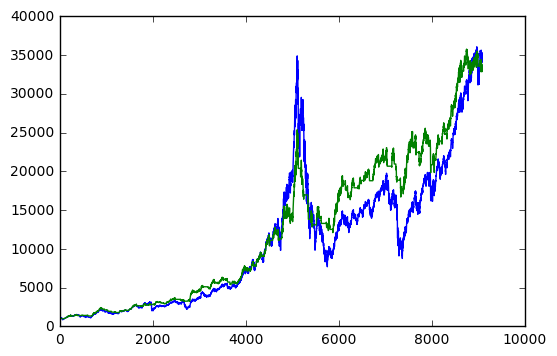

In [23]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(values[0])
plt.plot(values[1])